In [2]:
# model wrapper
import sys
import os
sys.path.append(os.getenv('BONNER_ROOT_PATH'))
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import PLACES_IMAGES
from model_evaluation.utils import get_activations_iden
from model_features.models.models import load_model_dict
from model_features.activation_extractor import Activations
from config import CACHE

DATASET = 'places'
HOOK = None
DEVICE = 'cuda'

## expansion model

In [3]:
model_info = load_model_dict('expansion_10000')
activations_identifier = get_activations_iden(model_info, DATASET)

with open(os.path.join(CACHE,'classification',activations_identifier),'rb') as f:
    performance_dict = pickle.load(f)

In [4]:
vars = list(set([var for pair in performance_dict.keys() for var in pair]))
var_to_idx = {var: idx for idx, var in enumerate(vars)}
matrix = np.zeros((len(vars), len(vars)))


for (var1, var2), corr in performance_dict.items():
    matrix[var_to_idx[var1], var_to_idx[var2]] = corr
    matrix[var_to_idx[var2], var_to_idx[var1]] = corr  # if the correlation matrix is symmetric
    

rows, cols = np.triu_indices(matrix.shape[0],k=1)
matrix_expansion = matrix[rows, cols]

print('mean:',matrix_expansion.mean())

mean: 0.7259949494949496


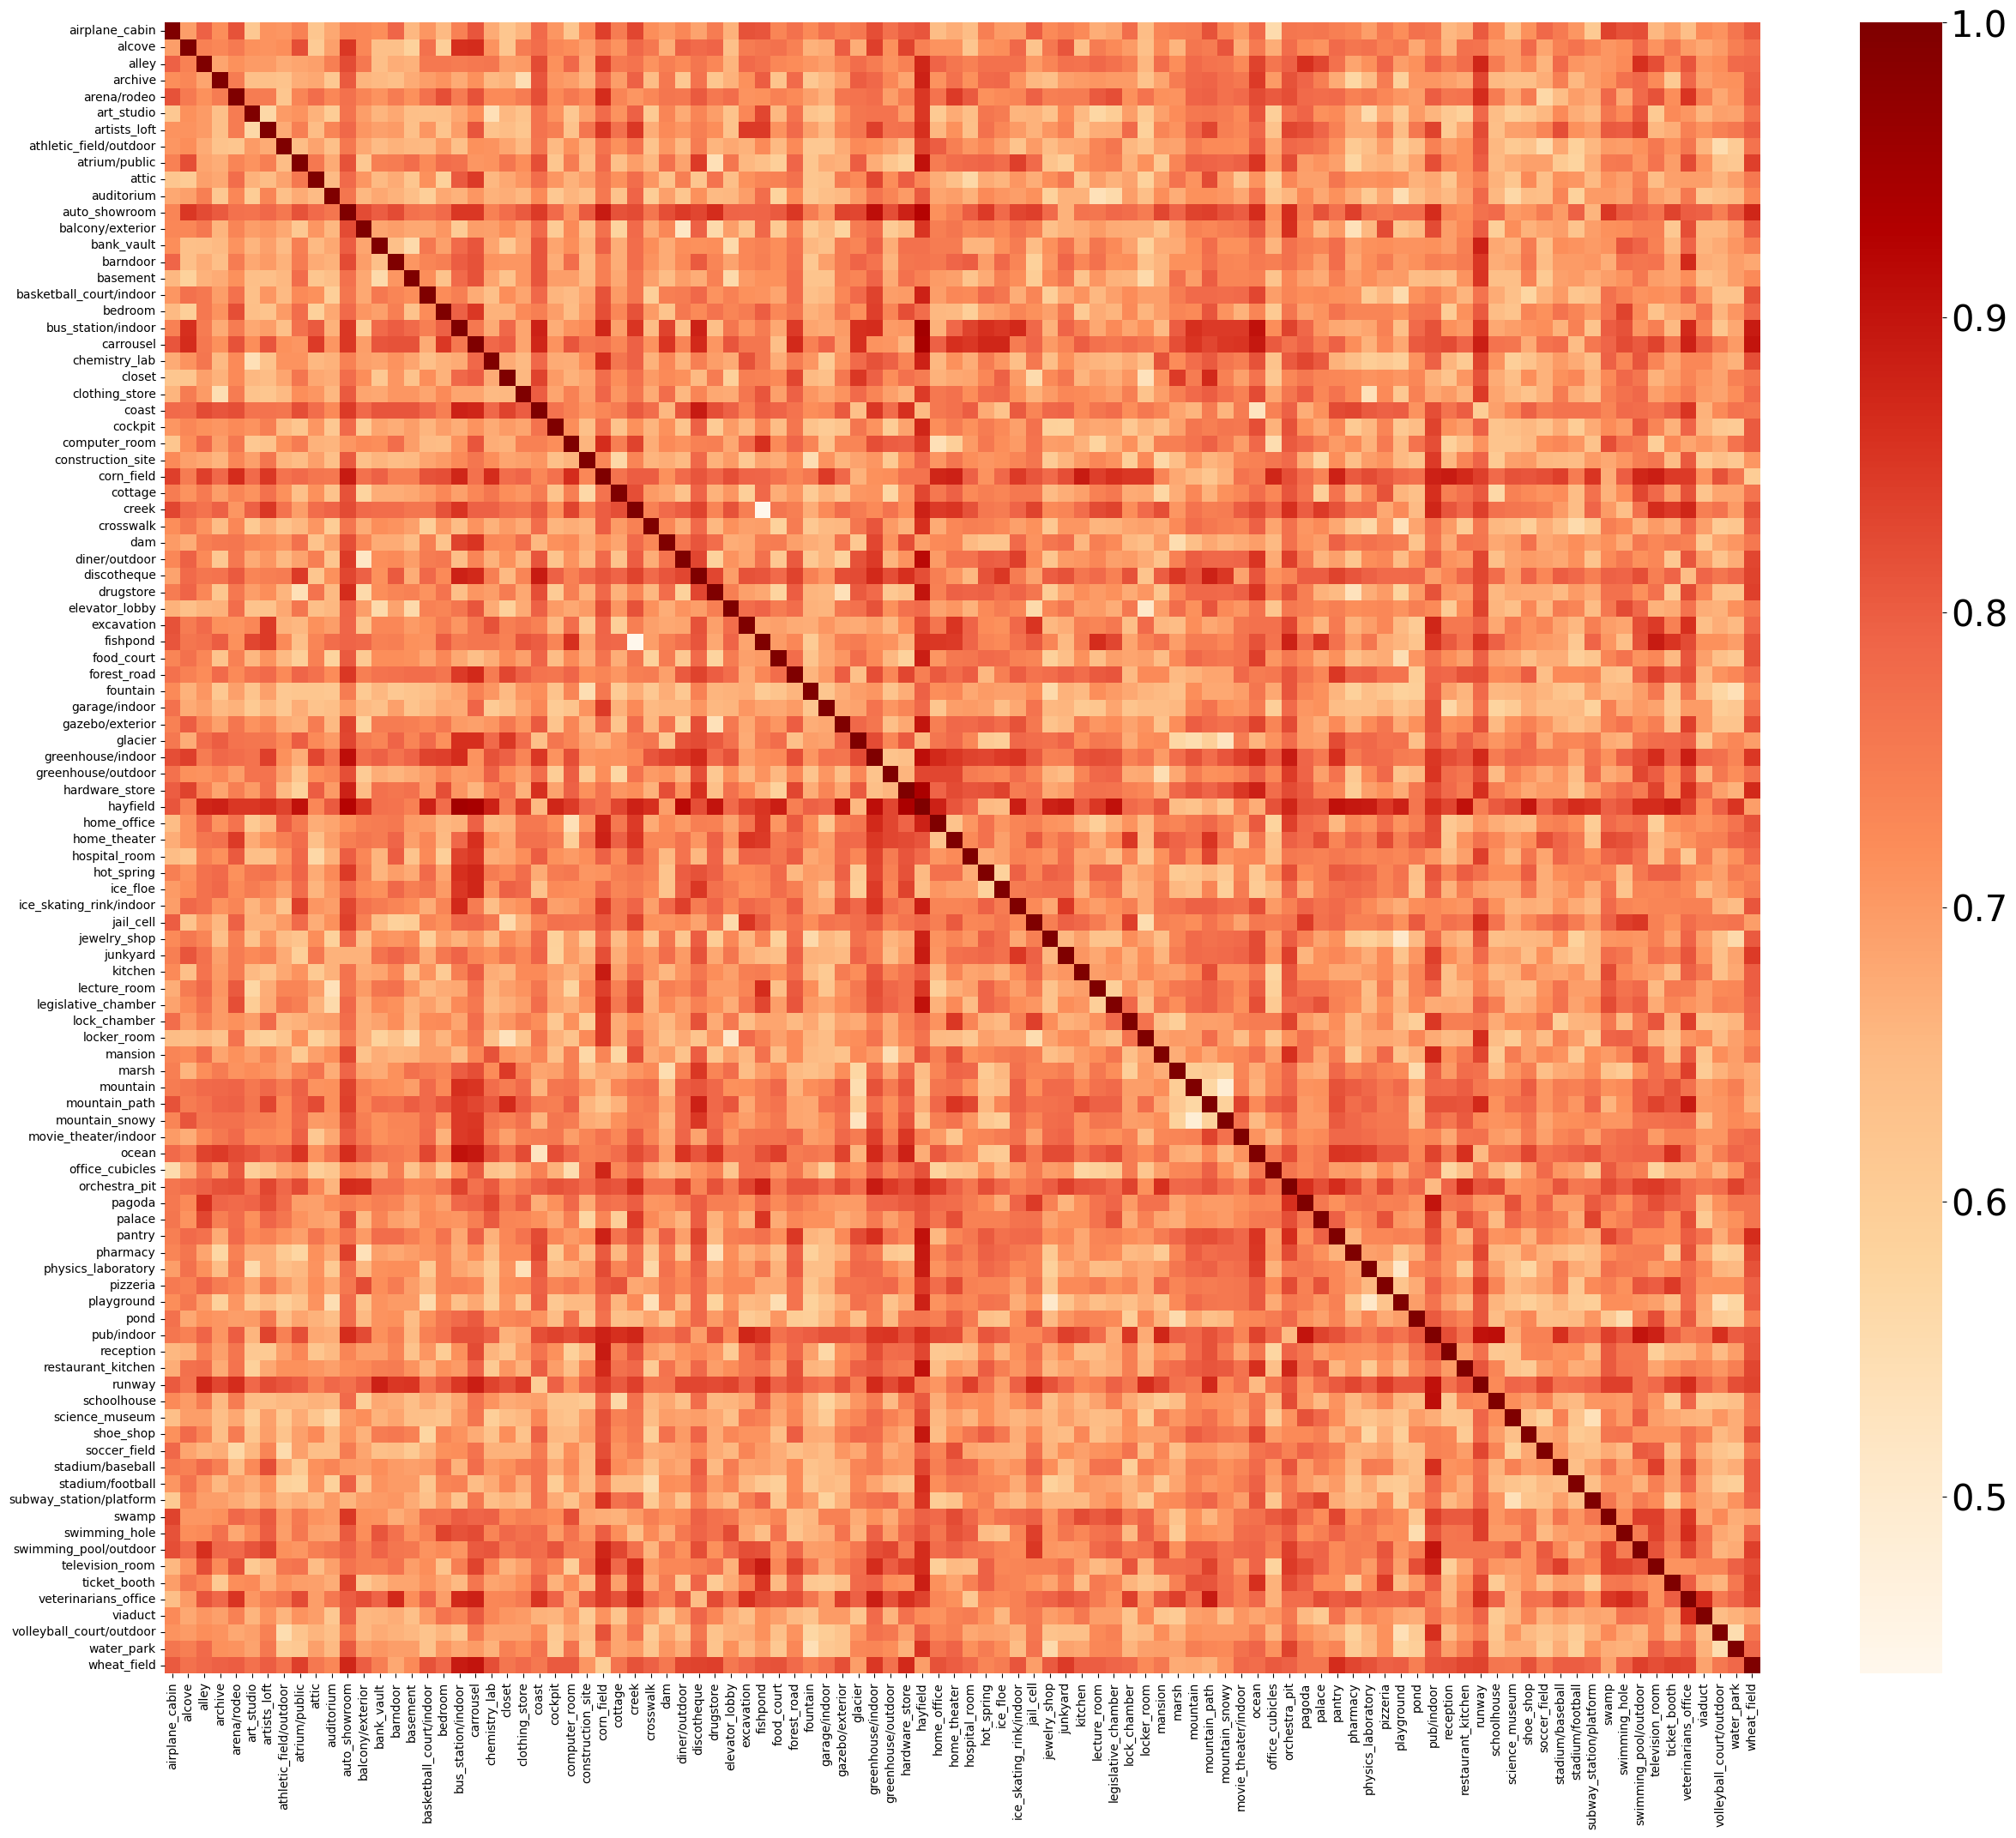

In [6]:
with open(os.path.join(PLACES_IMAGES,'categories_places365.txt'), "r") as file:
    content = file.read()
annotations = content.split('\n')
cat_names = {}
for i in annotations:
    name_number = i[3:].split(' ')
    cat_names[int(name_number[1])] = name_number[0]
    
    
class_names = [cat_names[i] for i in vars]
fig = plt.figure(figsize=(30, 25),dpi=100)
heatmap = sns.heatmap(matrix, annot=False, fmt="d", cmap='OrRd', xticklabels=class_names, yticklabels=class_names)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)
plt.savefig(f'pairwise_comparison_expansion.png', dpi=100)
plt.show()

## Alexnet

In [7]:
model_info = load_model_dict('alexnet_conv5')
activations_identifier = get_activations_iden(model_info, DATASET)

with open(os.path.join(CACHE,'classification',activations_identifier),'rb') as f:
    performance_dict = pickle.load(f)

In [8]:
vars = list(set([var for pair in performance_dict.keys() for var in pair]))
var_to_idx = {var: idx for idx, var in enumerate(vars)}
matrix = np.zeros((len(vars), len(vars)))


for (var1, var2), corr in performance_dict.items():
    matrix[var_to_idx[var1], var_to_idx[var2]] = corr
    matrix[var_to_idx[var2], var_to_idx[var1]] = corr  # if the correlation matrix is symmetric
    

rows, cols = np.triu_indices(matrix.shape[0],k=1)
matrix_alexnet = matrix[rows, cols]

print('mean:',matrix_alexnet.mean())

mean: 0.9208363636363637


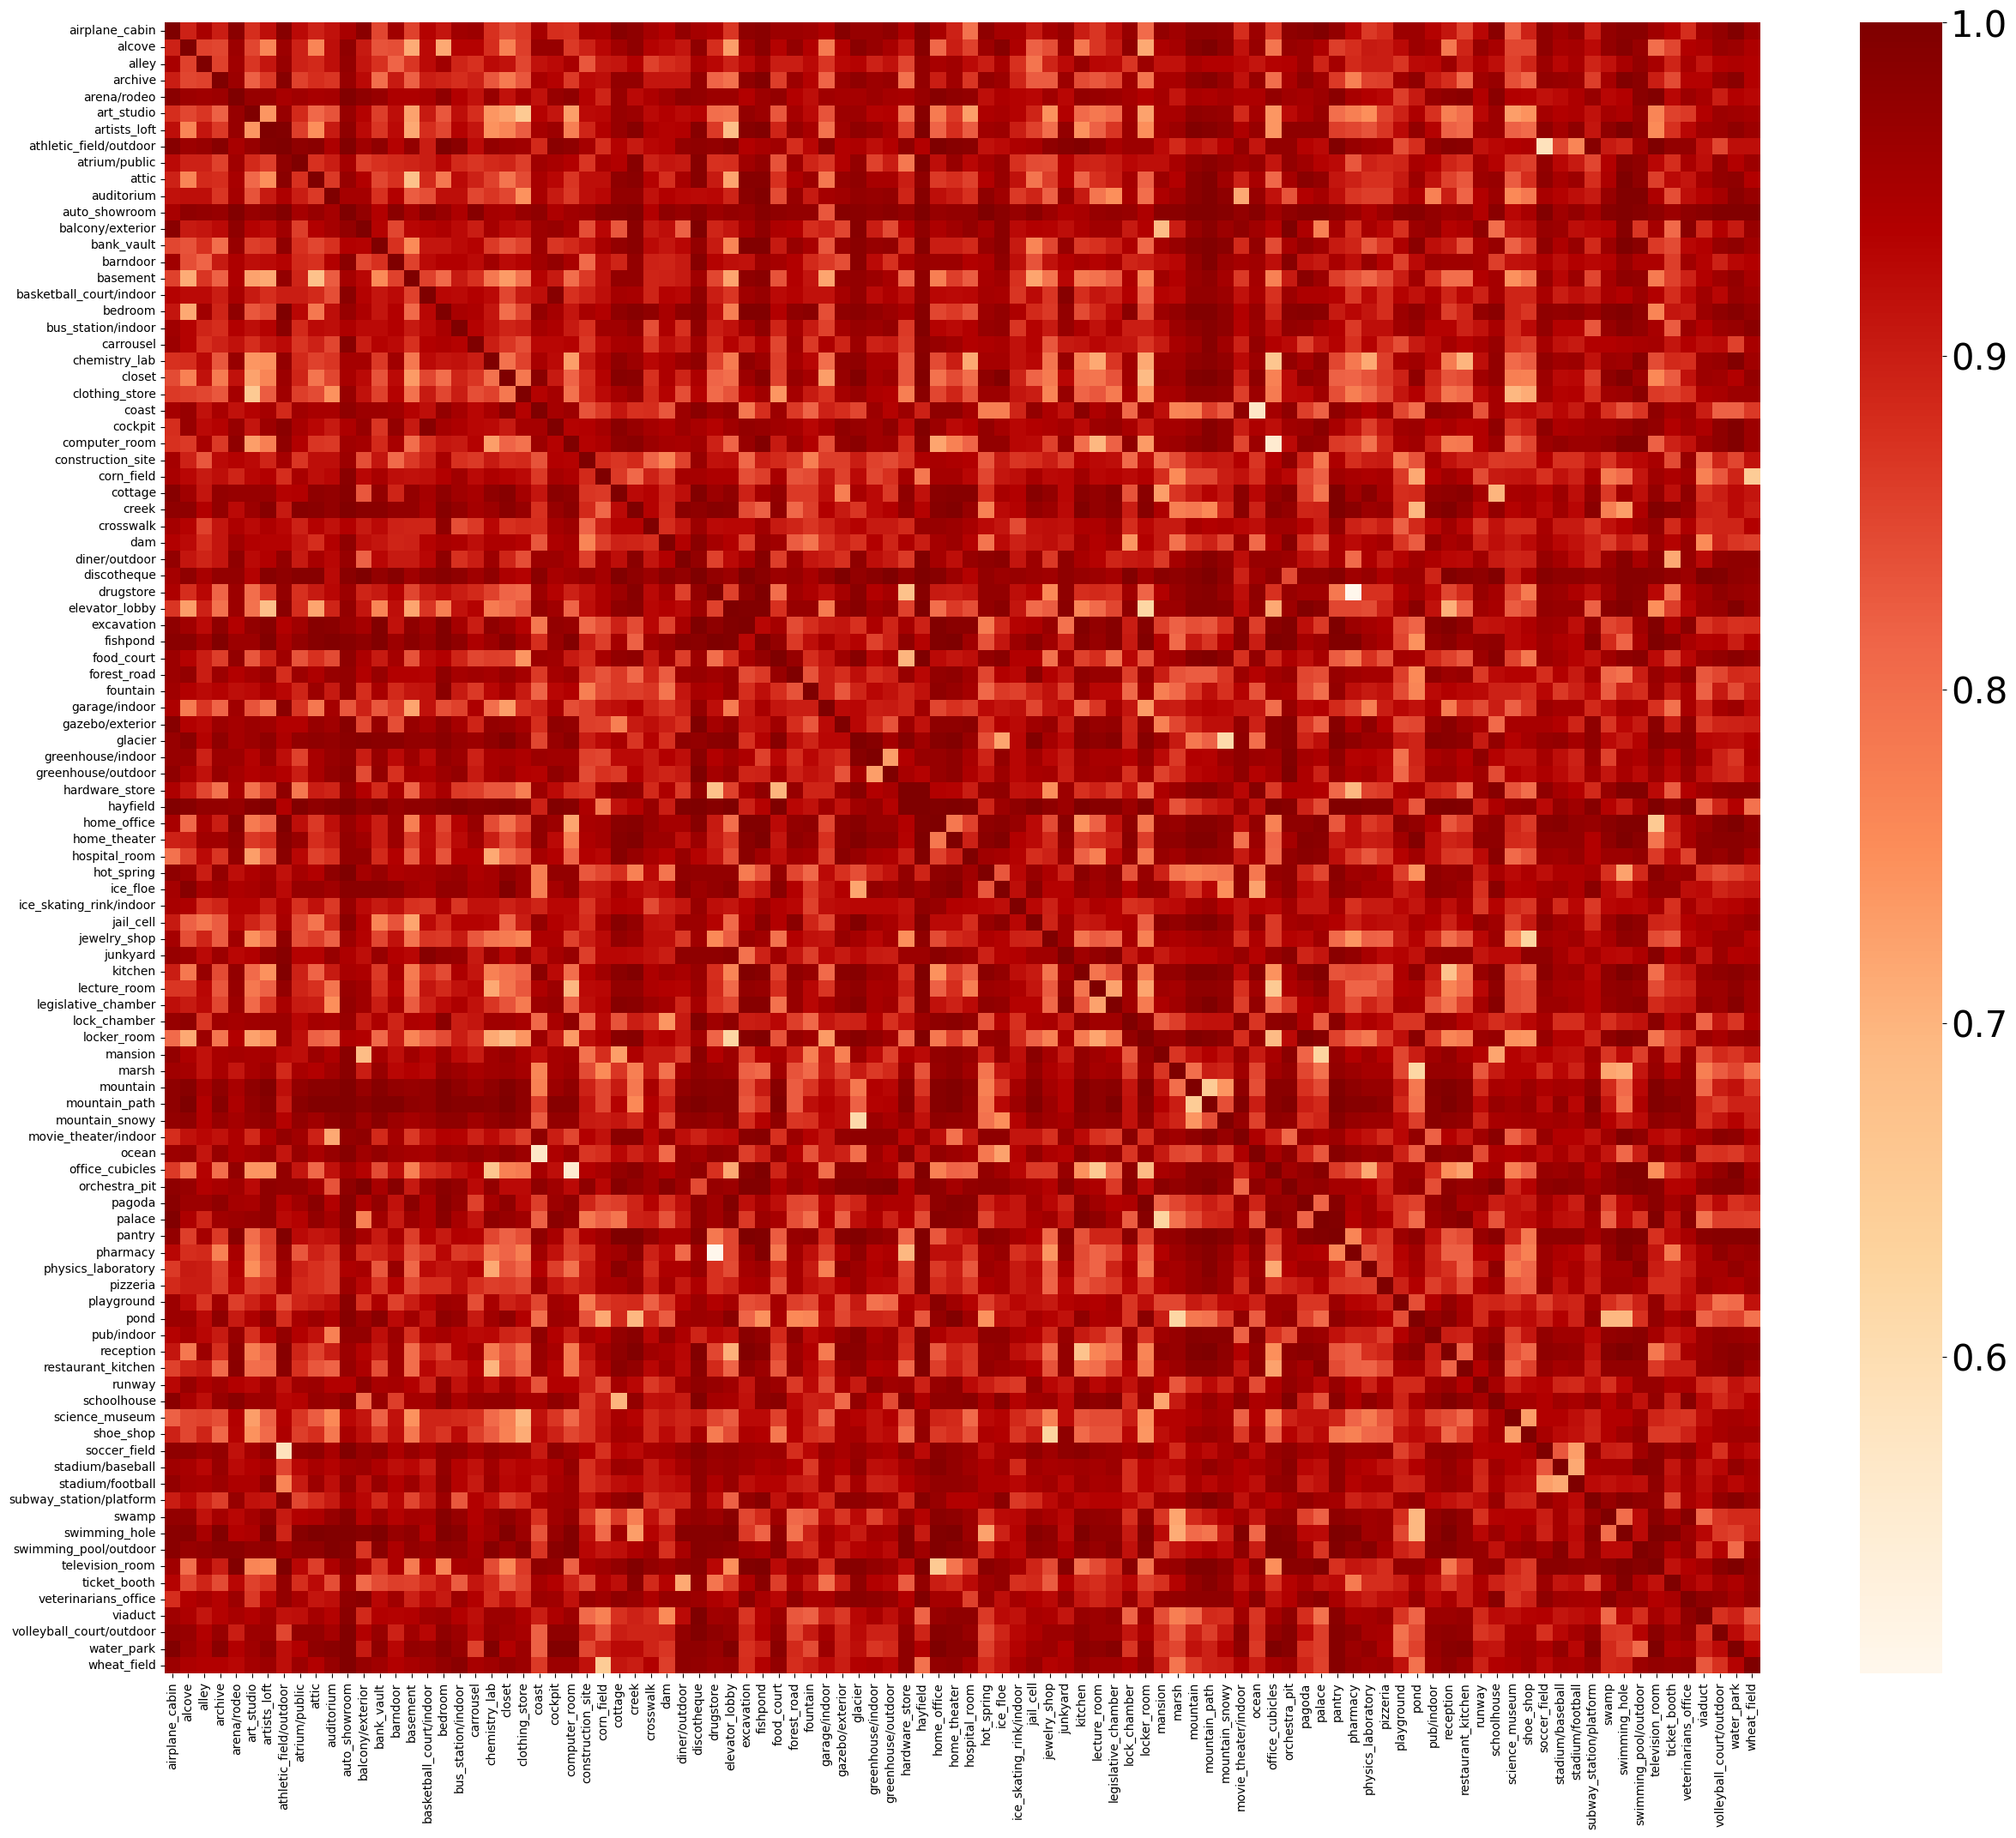

In [10]:
with open(os.path.join(PLACES_IMAGES,'categories_places365.txt'), "r") as file:
    content = file.read()
annotations = content.split('\n')
cat_names = {}
for i in annotations:
    name_number = i[3:].split(' ')
    cat_names[int(name_number[1])] = name_number[0]
    
    
    
    
class_names = [cat_names[i] for i in vars]
fig = plt.figure(figsize=(30, 25),dpi=100)
heatmap = sns.heatmap(matrix, annot=False, fmt="d", cmap='OrRd', xticklabels=class_names, yticklabels=class_names)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)
plt.savefig(f'pairwise_comparison_alexnet.png', dpi=100)
plt.show()

## Bar Graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


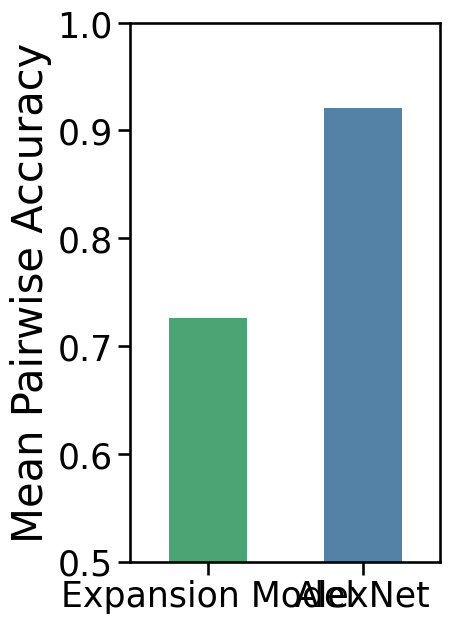

In [25]:
palette = {         
    'Expansion Model':'mediumseagreen',
    'AlexNet':'steelblue'
}


plt.clf()
sns.set_context(context='talk')    
plt.rcParams['figure.figsize'] = (4,7)


ax1 = sns.barplot(x = ['Expansion Model','AlexNet'], 
                  y = [matrix_expansion.mean(), 
                       matrix_alexnet.mean()], 
                       palette=palette,
                       width=0.5, 
                       dodge=False)            
    
ax1.legend().remove()
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.xlabel('')
plt.ylim(0.5,1)
plt.ylabel(size=30, ylabel='Mean Pairwise Accuracy')    
plt.xticks(size=25)
plt.yticks(size=25)
plt.savefig('expansion_vs_alexnet.png', bbox_inches='tight', dpi=300)

## Correlation between the pairwise matrices

In [10]:
np.corrcoef(matrix_expansion,matrix_alexnet)

array([[1.        , 0.50709022],
       [0.50709022, 1.        ]])